<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/zadanie_2_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive')

dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajęcia_1/Dzien 1/diamonds.csv'

Mounted at /drive


In [3]:
diamonds_df = pd.read_csv(dataset_path)
diamonds_df.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
diamonds_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
diamonds_df = diamonds_df.drop(['Unnamed: 0'], axis=1)

In [6]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
le.fit_transform(diamonds_df['cut'])


array([2, 3, 1, ..., 4, 3, 2])

In [9]:
diamonds_df['cut'] = le.fit_transform(diamonds_df['cut'])
diamonds_df['color'] = le.fit_transform(diamonds_df['color'])
diamonds_df['clarity'] = le.fit_transform(diamonds_df['clarity'])

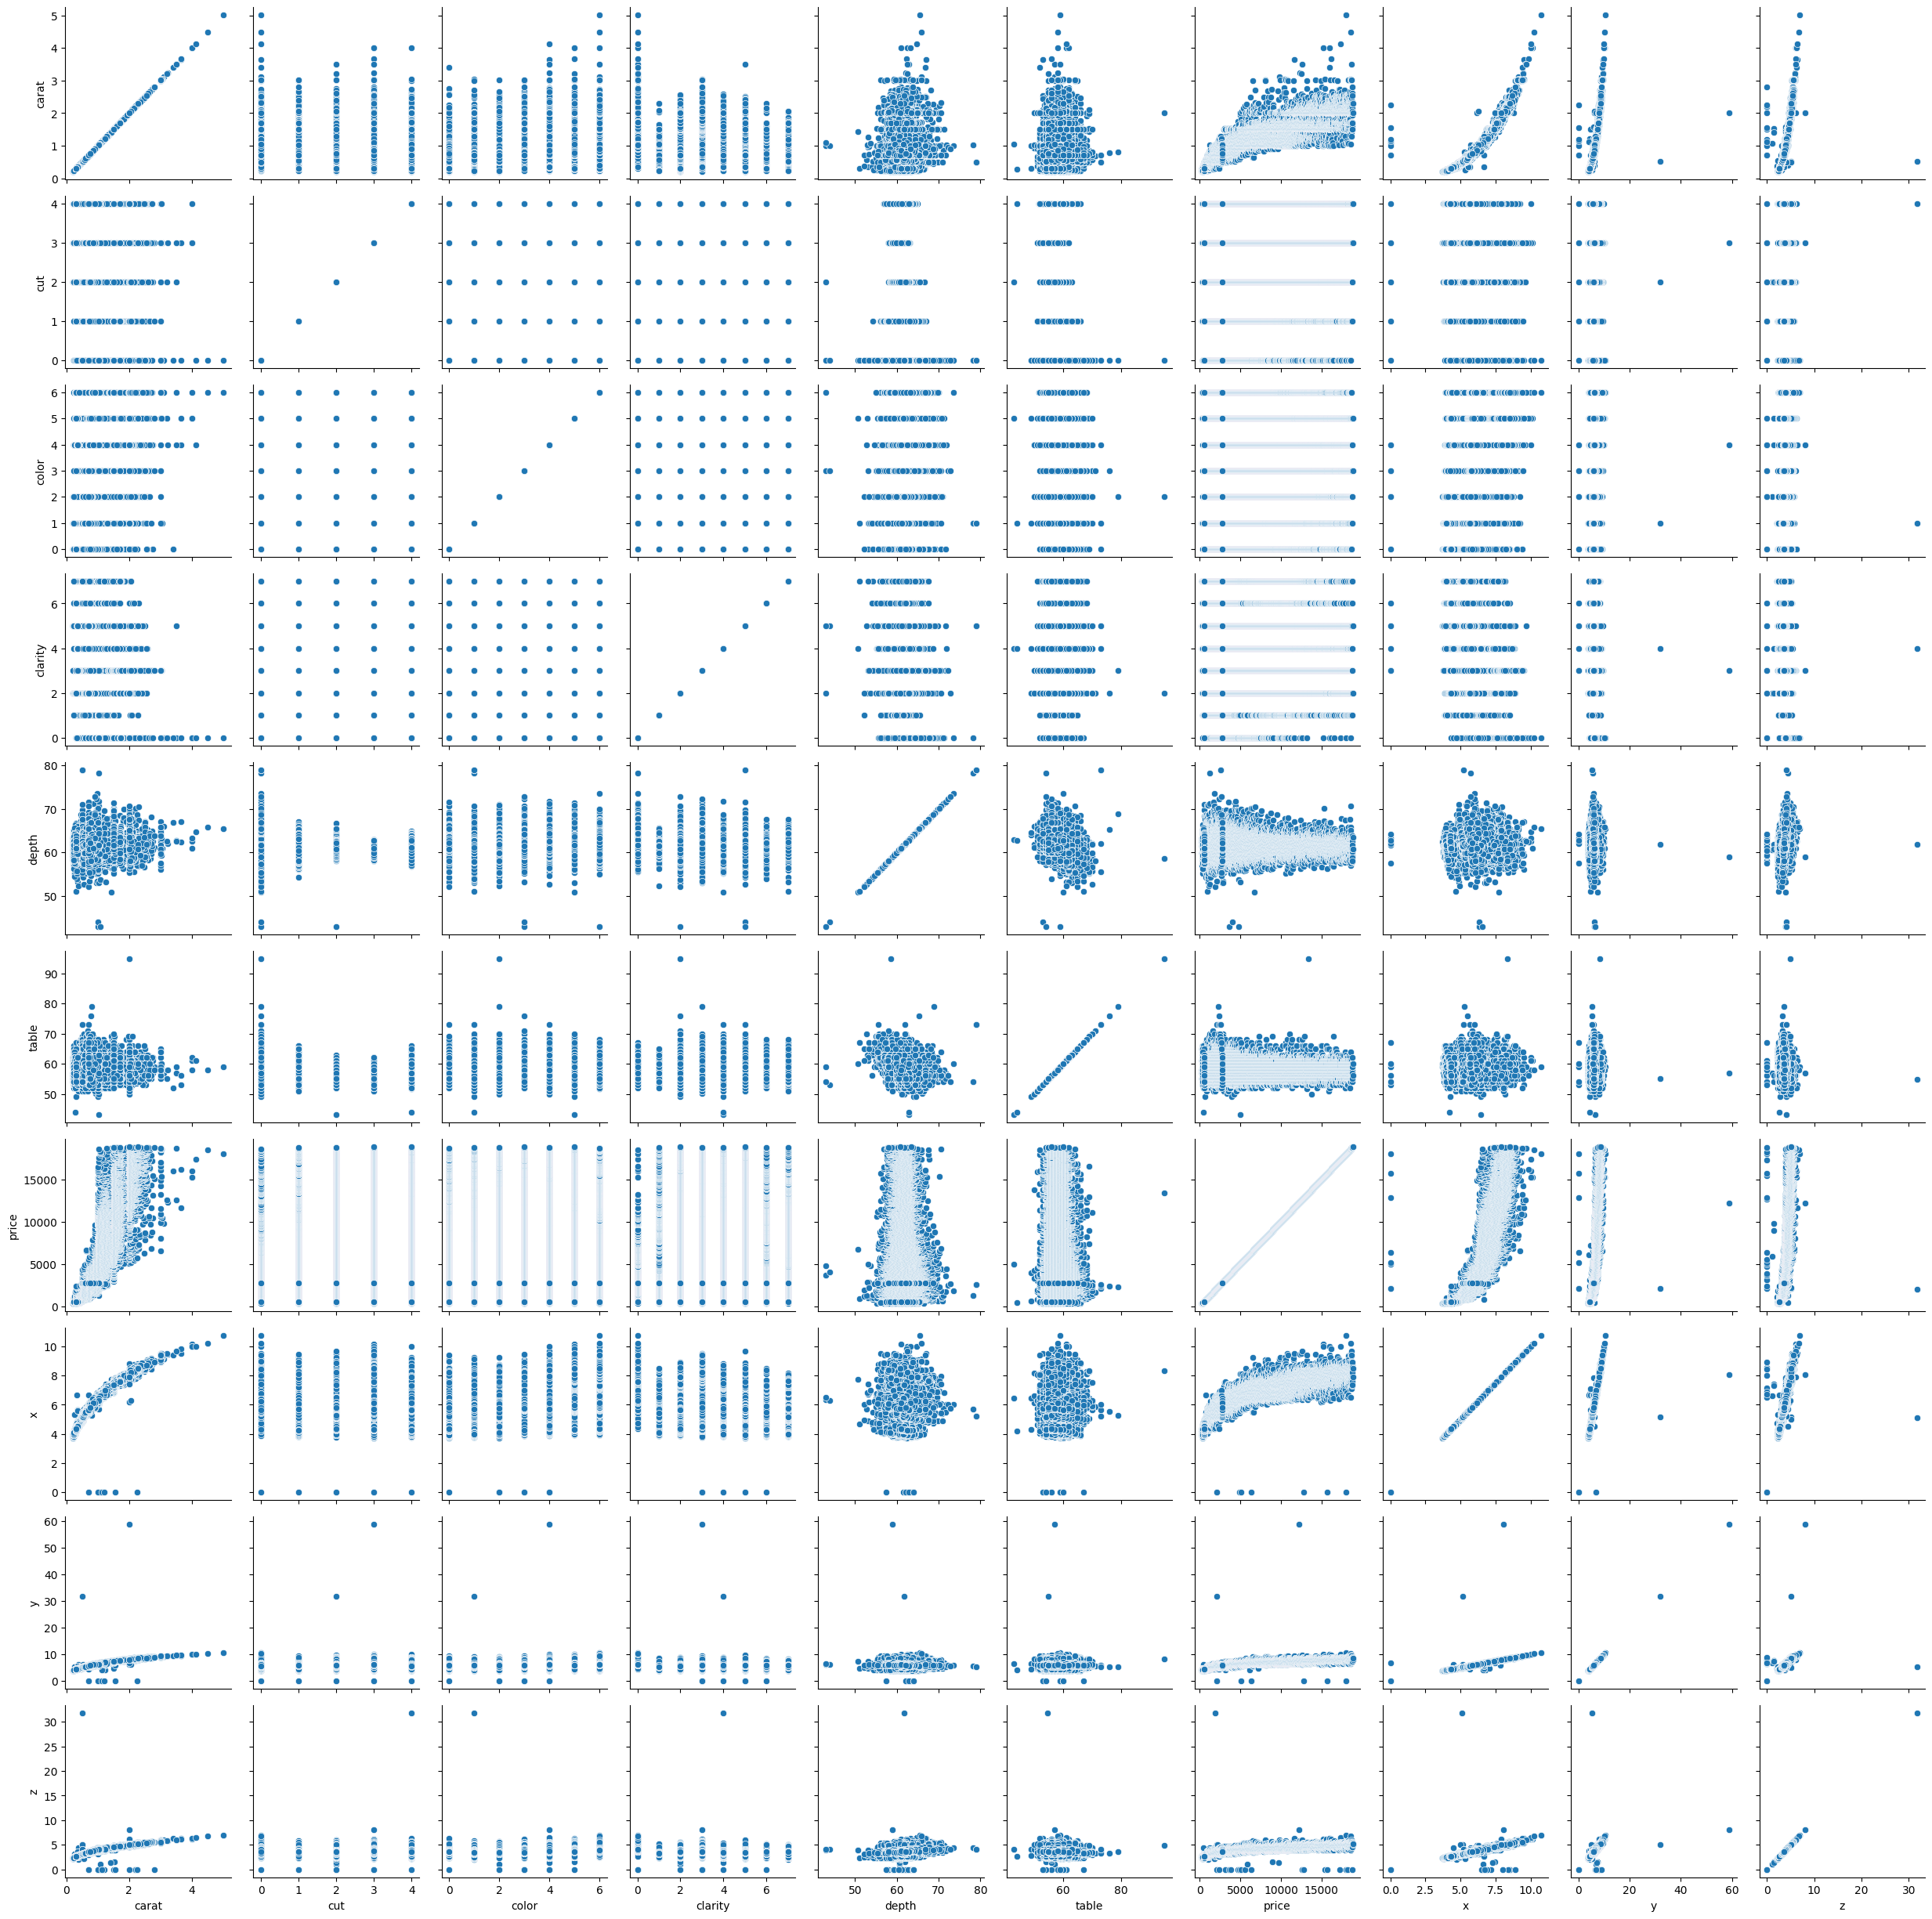

In [10]:
g = sns.PairGrid(diamonds_df)
g.map(sns.scatterplot)

In [11]:
corr_matrix = diamonds_df.corr()

<Axes: >

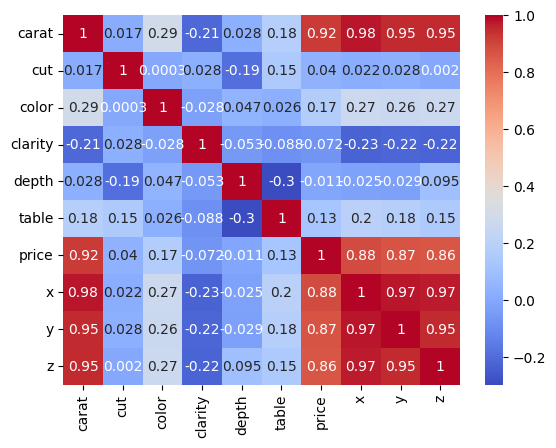

In [12]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [13]:
diamonds_df = diamonds_df.drop(['cut','clarity','depth'], axis=1)

In [14]:
columns_names = list(diamonds_df.columns)#
columns_names.remove('price')

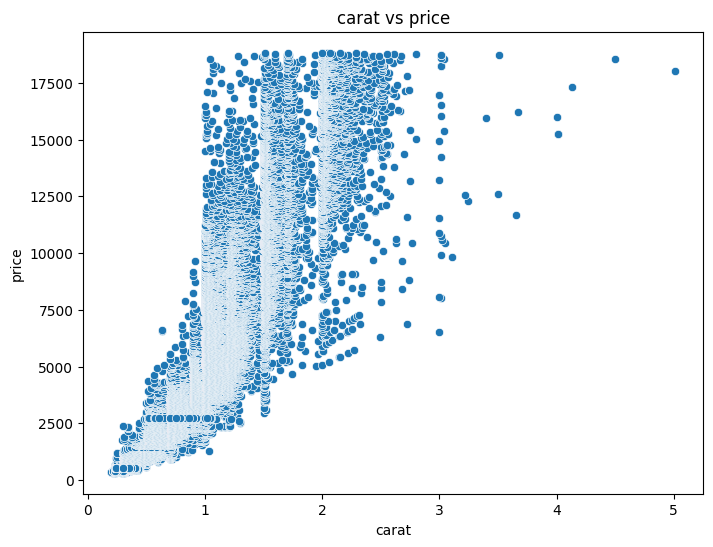

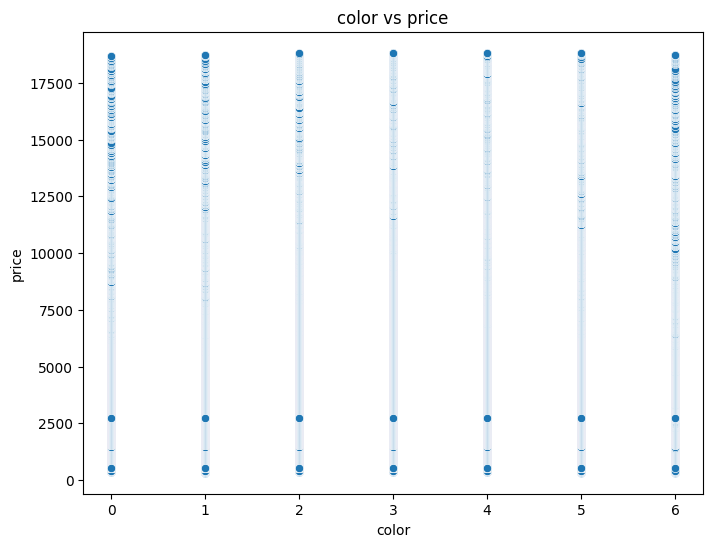

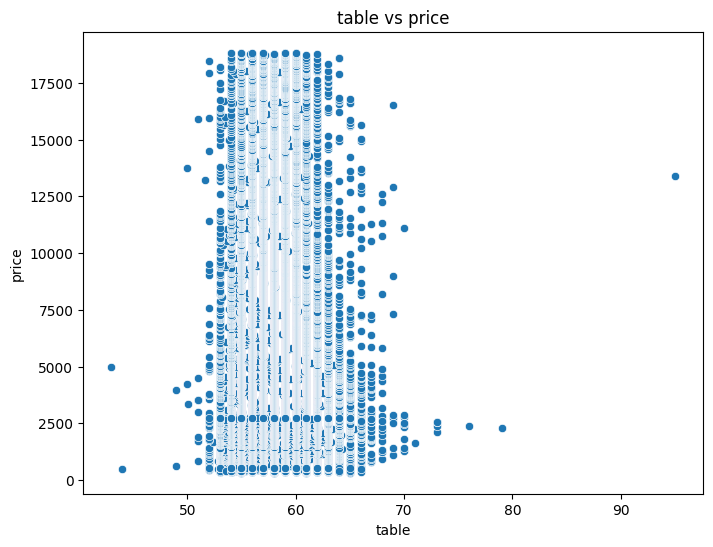

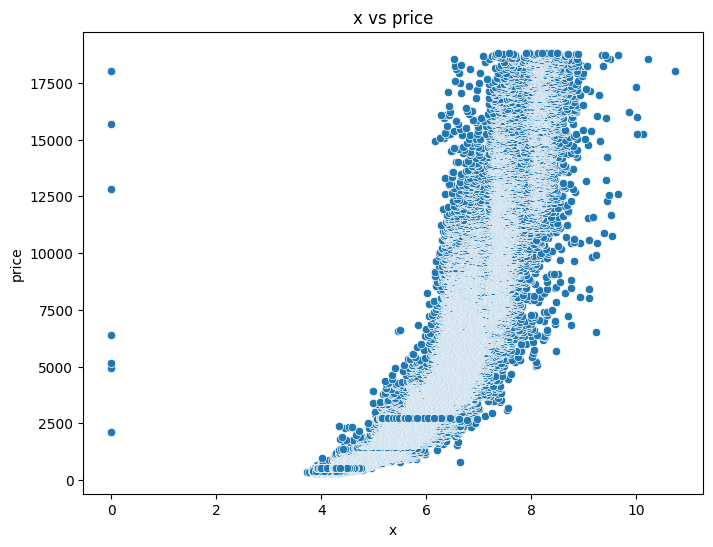

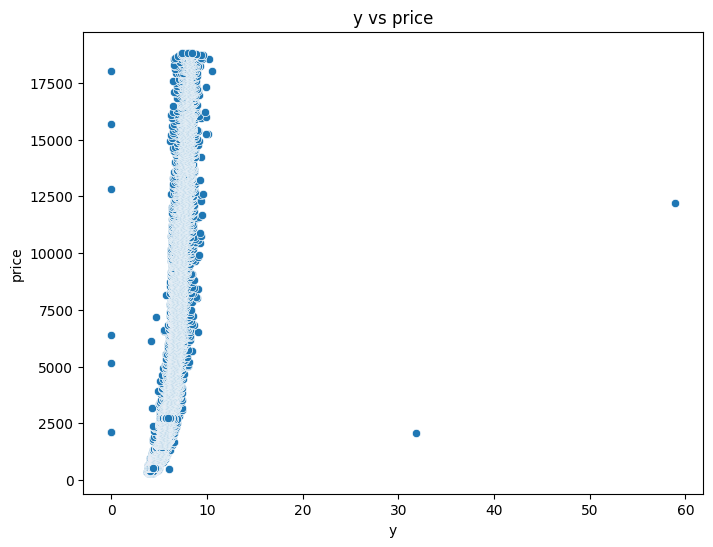

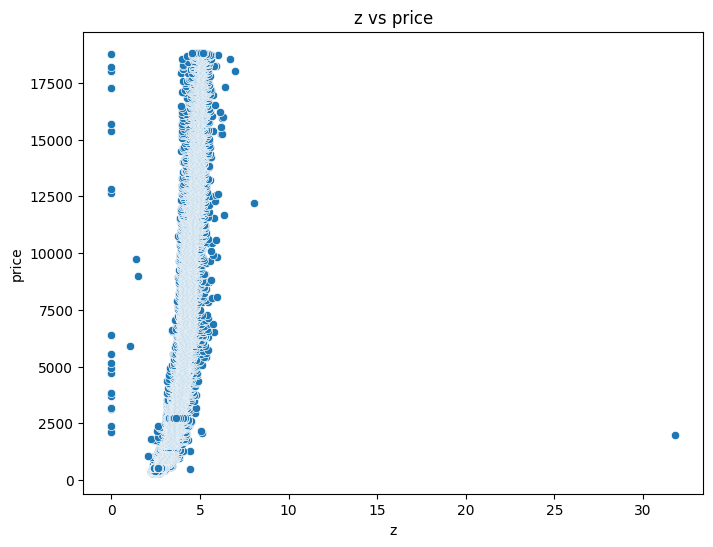

In [15]:
for col in columns_names:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(y=diamonds_df['price'], x=diamonds_df[col])

    plt.title(f'{col} vs price')
    plt.ylabel('price')
    plt.xlabel(f'{col}')
    plt.show()

In [16]:
diamonds_df.columns

Index(['carat', 'color', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [17]:
outliers_col = ['carat', 'x', 'y', 'z']

In [18]:
for col in outliers_col:
    Q1 = diamonds_df[col].quantile(0.25)
    Q3 =diamonds_df[col].quantile(0.75)
    IQR = Q3 - Q1
    val_min = Q1-1.5*IQR
    val_max = Q3+1.5*IQR
    #print(f'{val_min},{val_max}')
    diamonds_df = diamonds_df[(diamonds_df[col] >= val_min) & (diamonds_df[col] <= val_max)]



In [19]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52033 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   52033 non-null  float64
 1   color   52033 non-null  int64  
 2   table   52033 non-null  float64
 3   price   52033 non-null  int64  
 4   x       52033 non-null  float64
 5   y       52033 non-null  float64
 6   z       52033 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 3.2 MB


In [20]:
from sklearn.model_selection import train_test_split

X = diamonds_df.drop("price", axis=1)
y = diamonds_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lin_reg = LinearRegression()

In [23]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lin_reg.predict(X_test)

In [25]:
# Print R2 score value with .score() method
print(f"R2 score: {lin_reg.score(X_test, y_test)}") # or X_train, y_train for training set score

# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

R2 score: 0.8570023388087775
0.8570023388087775


In [26]:
df_final  = X

In [27]:
df_final['price'] = y

In [28]:
df_final.to_csv('diamonds_preprocessed_lw.csv')

In [29]:
import numpy as np

# Predict y values based on features in test set
y_pred = lin_reg.predict(X_test)

# Print R2 score value with .score() method
print(f"R2 score: {lin_reg.score(X_test, y_test)}") # or X_train, y_train for training set score


R2 score: 0.8570023388087775


In [30]:
# Get standarized features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_train_std, y_train)
print(f'std: {lin_reg_std.score(X_test_std, y_test)}')
# Get normalized features

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)

lin_reg_norm = LinearRegression()
lin_reg_norm.fit(normalized_X_train, y_train)
print(f'norm: {lin_reg_norm.score(normalized_X_test, y_test)}')

std: 0.8570023388087775
norm: 0.8494698681871707


In [31]:
# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))


#Średni błąd bezwzględny

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)

print(f"Mean absolute error: {mae}")

#Średni błąd kwadratowy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

print(f"Mean squared error: {mse}")

#Pierwiastek błędu średniokwadratowego

from sklearn.metrics import r2_score
r2_score(y_pred, y_test)
print(f"Root mean squared error: {np.sqrt(mse)}")

# Współczynnik determinacji R2
def adjusted_r2_score(r2, n, k):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adjusted_r2

print(adjusted_r2_score(lin_reg.score(X_test, y_test), len(y_test), len(X_test.columns)))

0.8570023388087775
Mean absolute error: 802.7278451191527
Mean squared error: 1622148.1806354842
Root mean squared error: 1273.6358116178596
0.8569473502830358


In [32]:
# Predict y values based on features in train set
y_pred_train = lin_reg.predict(X_train)

# Alternatively - R2 score using r2_score from sklearn.metrics
from sklearn.metrics import r2_score

print(r2_score(y_train, y_pred_train))


#Średni błąd bezwzględny

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred_train, y_train)

print(f"Mean absolute error: {mae}")

#Średni błąd kwadratowy
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_train, y_train)

print(f"Mean squared error: {mse}")

#Pierwiastek błędu średniokwadratowego
from sklearn.metrics import r2_score
r2_score(y_pred_train, y_train)
print(f"Root mean squared error: {np.sqrt(mse)}")

# Współczynnik determinacji R2
def adjusted_r2_score(r2, n, k):
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adjusted_r2

print(adjusted_r2_score(lin_reg.score(X_train, y_train), len(y_train), len(X_train.columns)))

0.8593308363126972
Mean absolute error: 801.3008502052191
Mean squared error: 1659060.5248963404
Root mean squared error: 1288.0452340257077
0.8593076592756222


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object with degree = 3
polynomial_features = PolynomialFeatures(degree=3)

# Fit and transform on our data
X_poly = polynomial_features.fit_transform(X)


lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_pred_poly = lin_reg_poly.predict(X_poly)


r2 = r2_score(y, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

R2: 0.9999999999999996
RMSE: 6.834115197672645e-05


In [35]:
# Create PolynomialFeatures object with degree = 2
polynomial_features = PolynomialFeatures(degree=2)

# Fit and transform on our data
X_poly = polynomial_features.fit_transform(X)


lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_pred_poly = lin_reg_poly.predict(X_poly)


r2 = r2_score(y, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred_poly))
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

R2: 1.0
RMSE: 2.6776785720696965e-12


In [44]:
# Get standarized features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_train_std, y_train)
print(f'std: {lin_reg_std.score(X_test_std, y_test)}')
# Get normalized features

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train)
normalized_X_train = normalizer.transform(X_train)
normalized_X_test = normalizer.transform(X_test)


from sklearn.tree import DecisionTreeRegressor

# Initialize decision tree model
reg_tree = DecisionTreeRegressor(max_depth=3)

# Train model
reg_tree.fit(X, y)



std: 0.8570023388087775


DecisionTreeRegressor(max_depth=3)

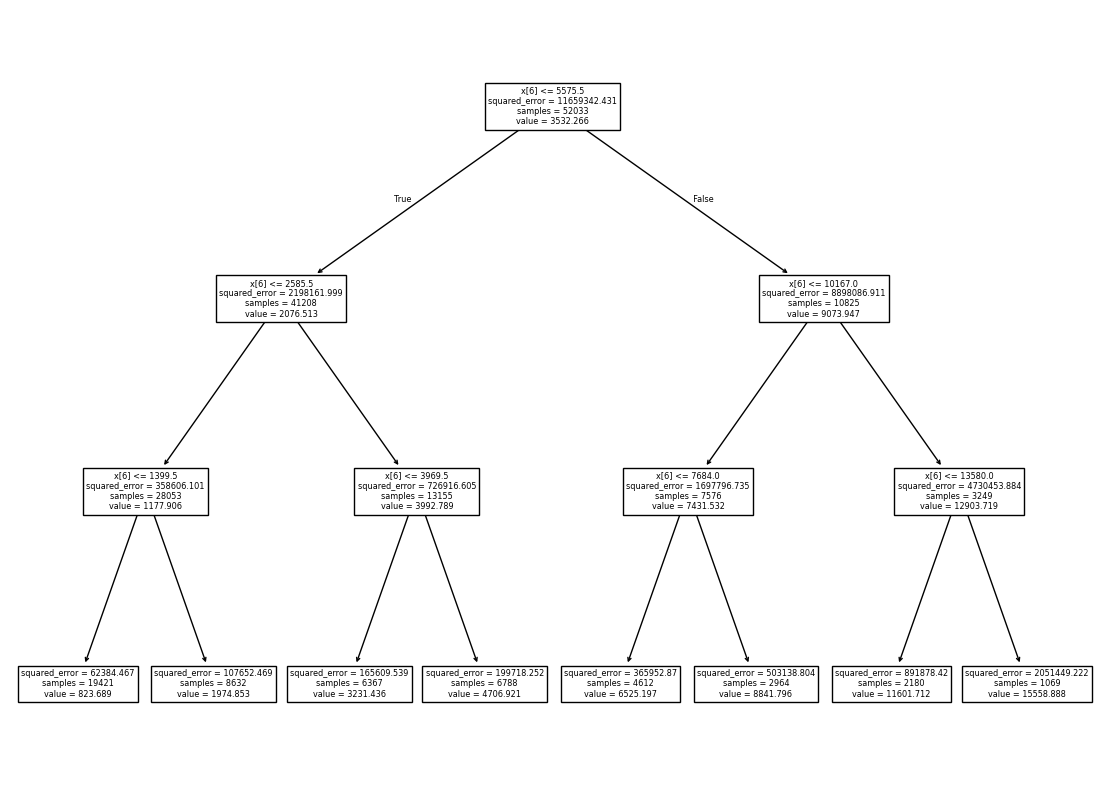

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 10))
plot_tree(reg_tree)

plt.show()

ValueError: x and y must be the same size

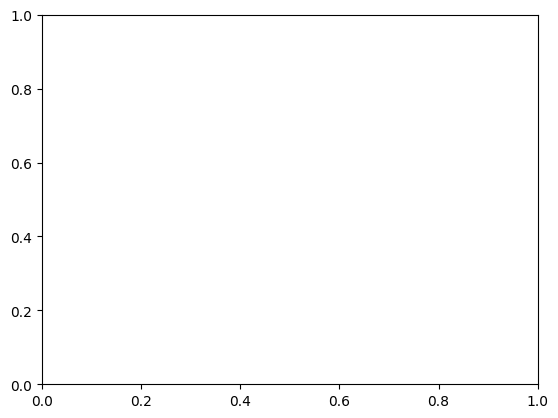

In [39]:
import numpy as np

# Plot dataset
plt.scatter(X, y, s=10, color="r")

# Plot model decision boundries
plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)
plt.plot(plot_data, reg_tree.predict(plot_data), color="lightblue")